In [25]:
import networkx as nx
import json

with open('DATA/data.txt') as f:
    data = json.load(f)

# create DiGraph for the network
G = nx.DiGraph()

for celebrity in data.keys():
    # get node attributes = category, followersCount, friendCount, tweetsCount, rank
    vcategory = data[celebrity]['category']
    vfollowersCount = data[celebrity]['followersCount']
    vfriendCount = data[celebrity]['friendCount']
    vtweetsCount = data[celebrity]['tweetsCount']
    vrank = data[celebrity]['rank']
    vname = data[celebrity]['name']
    
    # add node with the attributes
    G.add_node(celebrity, 
               category=vcategory, 
               followersCount=vfollowersCount, 
               friendCount=vfriendCount, 
               tweetsCount=vtweetsCount, 
               rank=vrank,
               name=vname
              )

# add links to the friends of the account (accounts that the user is following)
for celebrity in data.keys():
    if "friendList" in data[celebrity].keys(): # if friendList is available for the account
        for friend in data[celebrity]["friendList"]:  # check all friends
            if friend in data.keys():  # if the account follows another account in the elite
                G.add_edge(celebrity, friend)  # add a link between the two accounts

print("done")

done


In [ ]:
nx.draw_networkx(G)

In [4]:
nx.draw_spring(G, node_size=20, node_color='#FF0040')

In [3]:
print G.nodes(data=True)['Caradelevingne']

{'followersCount': u'10,205,976', 'language': u'Actors', 'friendCount': u'1,032', 'rank': u'318', 'tweetsCount': u'7,485', 'name': u'Cara Delevingne'}


In [26]:
import json
import networkx as nx

print("done")
g=G
nodes = [{'name': str(i), 'club': g.node[i]['category']}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)


done


In [22]:
G = nx.bfs_tree(G, "SnoopDogg")

for celebrity in data.keys():
    # get node attributes = category, followersCount, friendCount, tweetsCount, rank
    vcategory = data[celebrity]['category']
    vfollowersCount = data[celebrity]['followersCount']
    vfriendCount = data[celebrity]['friendCount']
    vtweetsCount = data[celebrity]['tweetsCount']
    vrank = data[celebrity]['rank']
    vname = data[celebrity]['name']
    
    # add node with the attributes
    attrs = {celebrity: {'language': vcategory, 'name': vname, 'loc': 100}}
    nx.set_node_attributes(G, attrs)

G.node['SnoopDogg']

{'language': u'Singers', 'loc': 100, 'name': u'Snoop Dogg'}

In [23]:
with open('graph.json', 'w') as f:
    json.dump(nx.tree_data(G,"SnoopDogg"),f)



In [3]:
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(G.to_undirected(), pos=None, iterations=10)



100%|██████████| 10/10 [00:00<00:00, 210.74it/s]

('BarnesHut Approximation', ' took ', '0.01', ' seconds')
('Repulsion forces', ' took ', '0.02', ' seconds')
('Gravitational forces', ' took ', '0.00', ' seconds')
('Attraction forces', ' took ', '0.00', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.00', ' seconds')


In [4]:
sizeList = []
for node in G.nodes():
    sizeList.append(G.degree(node))

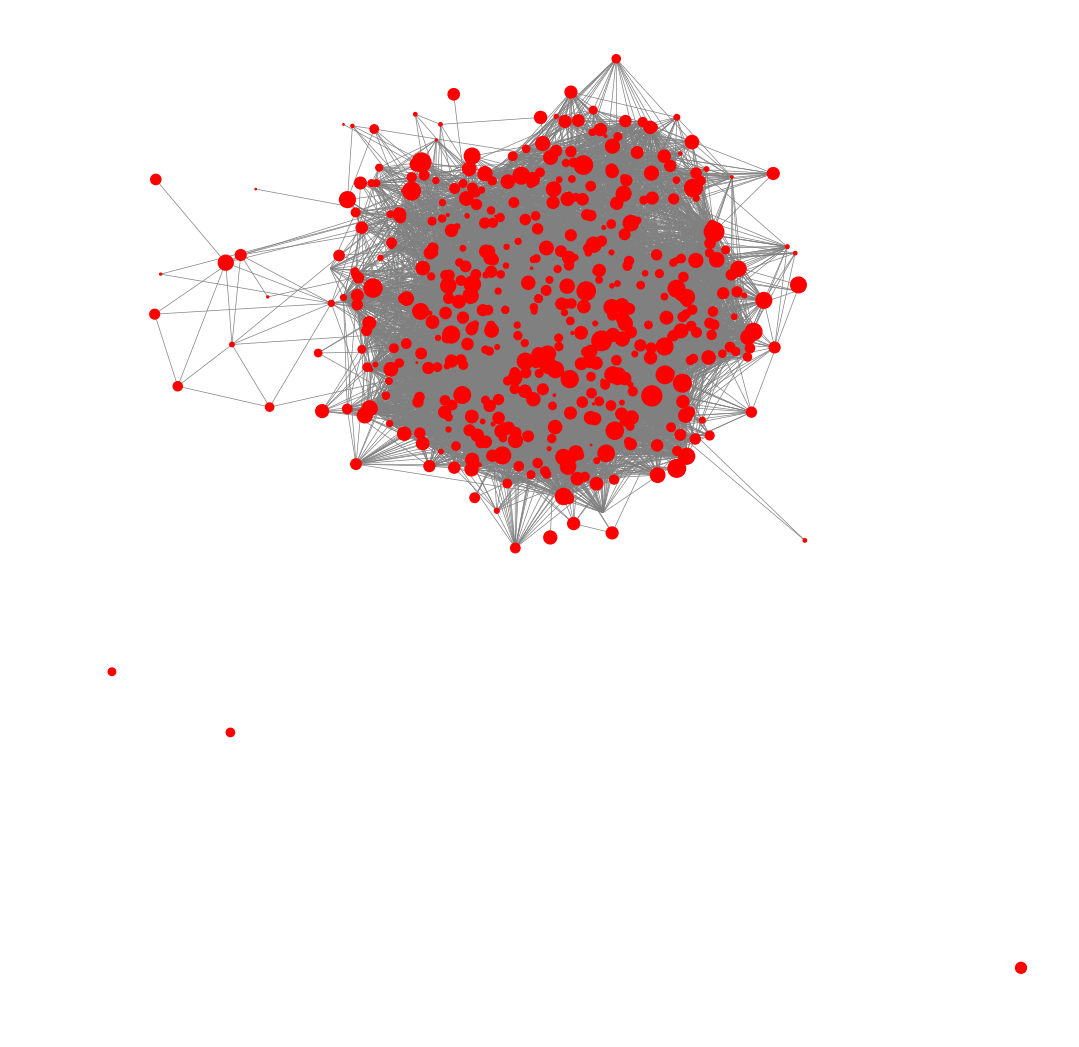

In [5]:
#fig, ax0 = plt.subplots(1,1)
plt.figure(figsize = (10,10),dpi=100)
nx.draw(G.to_undirected(), pos = positions, width=0.5, node_size=sizeList,edge_color='#808080')
plt.show()